<a href="https://colab.research.google.com/github/Yukkitsune/TBank-Analytics/blob/main/Machine%20learning/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Цель: Научиться применять методы предобработки данных на реальном датасете, оценивать их влияние на качество модели и понимать важность каждого этапа.

Дтасет Bank Marketing Dataset

Ссылка для примера: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

Целевая переменная: deposit (будет ли клиент открывать депозит).



**Важное условие:** С самого начала разделите исходные данные на обучающую (train) и тестовую (test) выборки в соотношении 80/20. Используйте параметр random_state=42 для воспроизводимости. Все этапы предобработки (заполнение пропусков, кодирование, масштабирование, PCA) должны настраиваться/обучаться ТОЛЬКО на обучающей выборке, а затем применяться к тестовой. Это критически важно для корректной оценки. За основную модель возьмите Random Forest Classifier

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

# 1. Базовый анализ (1 балл)

- Загрузите данные, разделите на train/test

- Проведите разведочный анализ данных, посмотрите распределение целевой переменной

- Обучите модель на числовых признаках без обработки (baseline) и на тестовой выборке оцените accuracy


In [ ]:
path = kagglehub.dataset_download("henriqueyamahata/bank-marketing")
import os
for file in os.listdir(path):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, file), sep=';')
        print(f"Загружен файл: {file}")
        break

Загружен файл: bank-additional-full.csv


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


В датасете нет явных пропусков в числовых и категориальных фичах

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Загрузите данные, разделите на train/test

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify = y
)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (32950, 20)
Shape of X_test: (8238, 20)
Shape of y_train: (32950,)
Shape of y_test: (8238,)


## Проведите разведочный анализ данных, посмотрите распределение целевой переменной

In [ ]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25611,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8
26010,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8
40194,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6
297,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
36344,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2


In [ ]:
y_train.value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

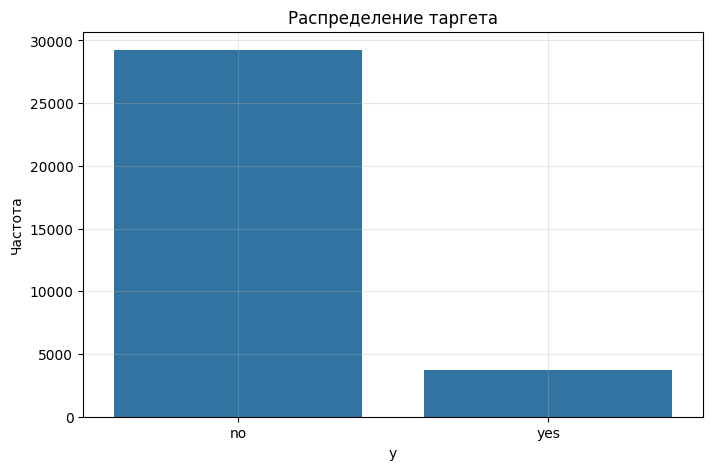

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values)
plt.title('Распределение таргета')
plt.xlabel('y')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
def plot_all_features(df: pd.DataFrame) -> None:
    num_cols = df.shape[1]
    num_rows = (num_cols + 2) // 3
    plt.figure(figsize=(18, 5*num_rows))
    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)
        if column in df.select_dtypes(include=np.number):
            sns.histplot(df[column], kde=True)
        else:
            sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
            plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.title(f'Распределение {column}')
        plt.tight_layout()
    plt.show()

При более подробном анализе через распределения видно, что в качестве пропусков в категориальных фичах есть 'unknown'

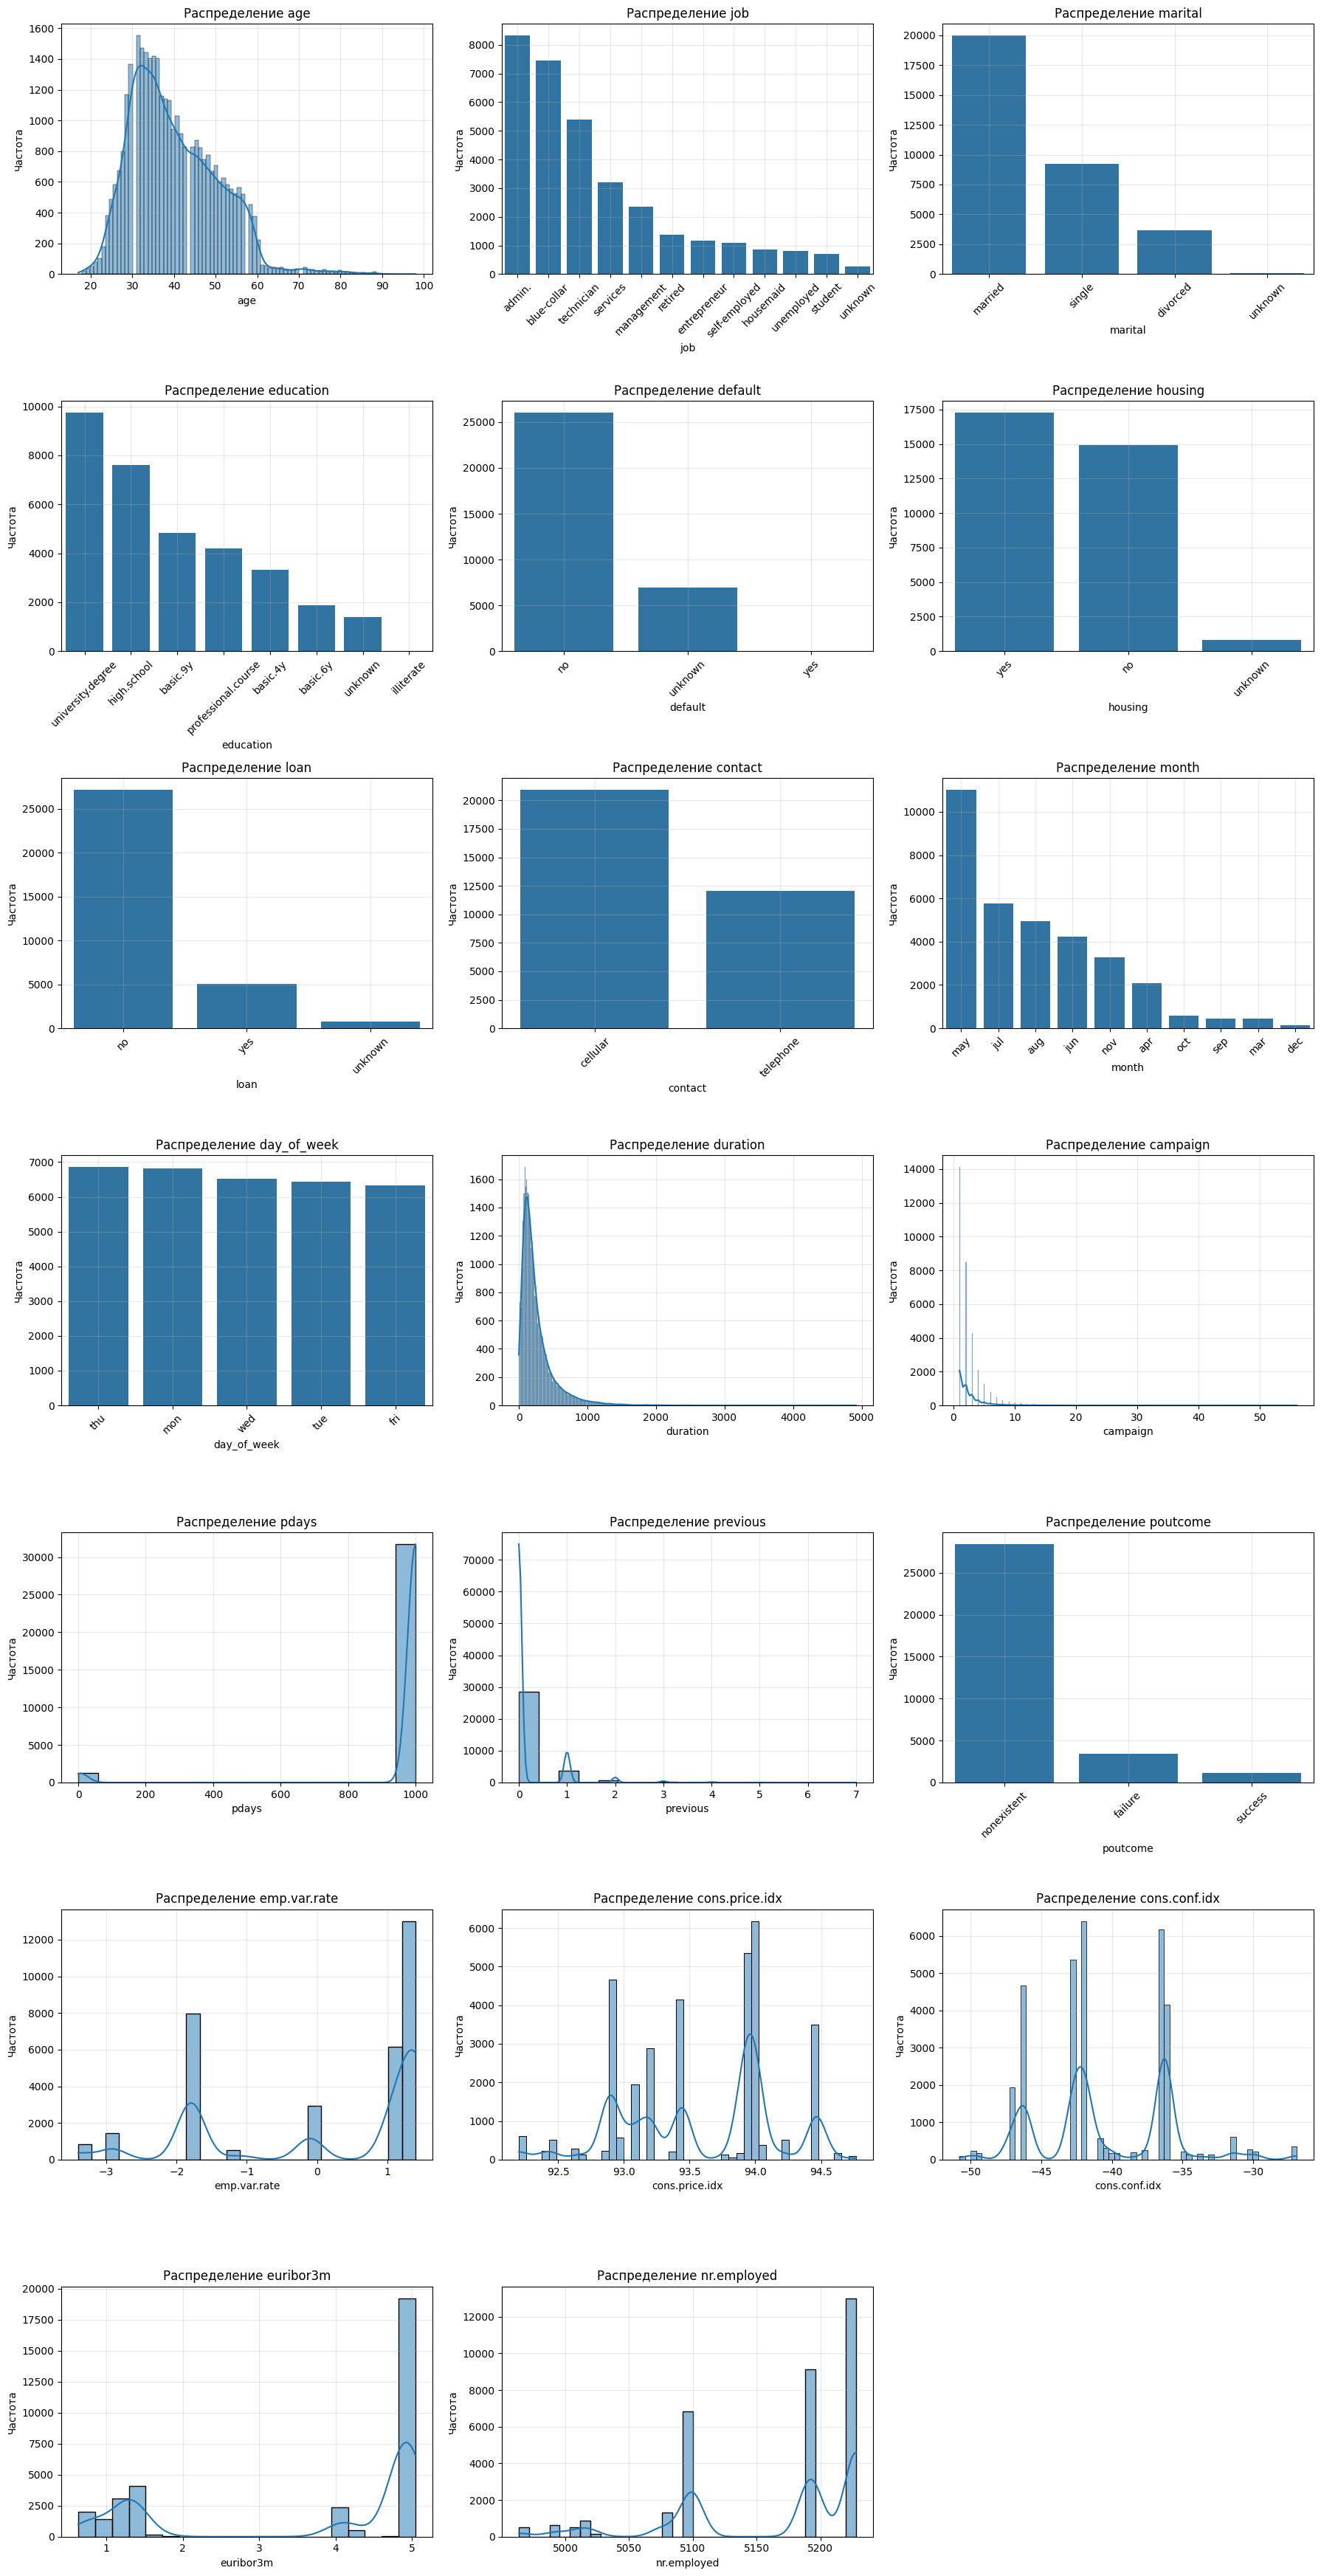

In [ ]:
plot_all_features(X_train)

## Обучите модель на числовых признаках без обработки (baseline) и на тестовой выборке оцените accuracy

В функции print_diff будем сохранять результаты каждой из моделей, чтобы затем было удобно анализировать разницу между ними

In [ ]:
def print_diff(current: dict, all_models: dict) -> None:
    current_name = list(current.keys())[0]
    current_acc = current[current_name]
    print(f'{"=" * 40}\n')
    print(f'Accuracy score {current_name} -> {current_acc:.4f}')
    print(f'\n{current_name} accuracy difference with other models:')
    for name, acc in all_models.items():
        diff = current_acc - acc
        rel_diff = (diff / acc) * 100
        print(f'{name} -> {diff:.4f} ({rel_diff:+.4f}%)')
    print(f'{"=" * 40}\n')
    all_models[current_name] = current_acc

В функции get_rf_acc будем создавать необходимый случайный лес и возвращать его accuracy score и саму модель при необходимости

In [ ]:
def get_rf_accuracy_model(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    X_test: pd.DataFrame,
    y_test: pd.DataFrame
        ) -> tuple:
    rf = RandomForestClassifier(
        random_state=42
    )
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, rf_pred)
    return acc, rf


In [ ]:
X_train_num = X_train.select_dtypes(include=np.number)
X_test_num = X_test.select_dtypes(include=np.number)
rf_baseline_acc, _ = get_rf_accuracy_model(
    X_train_num,
    y_train,
    X_test_num,
    y_test
)
print(f'Accuracy score Baseline -> {rf_baseline_acc:.4f}')

Accuracy score Baseline -> 0.9164


In [ ]:
all_models = {'Baseline' : rf_baseline_acc}

# 2. Обработка пропусков (2 балла)

- Найдите и заполните пропуски в train (2 способами):
  - Удаление строк с пропусками
  - Замена пропусков на медиану (для числовых) или моду (для категориальных).

- Обучите модель на данных без пропусков и на тестовой выборке оцените accuracy

## Найдите и заполните пропуски в train (2 способами):
### Удаление строк с пропусками
### Замена пропусков на медиану (для числовых) или моду (для категориальных).

In [ ]:
def delete_unknown_train(X_train: pd.DataFrame, y_train: pd.DataFrame) -> tuple:
    X_clean = X_train.copy()
    X_clean = X_clean.dropna()
    cat_features = X_clean.select_dtypes(include='object').columns.tolist()
    unknown_mask = pd.Series([False] * len(X_clean), index=X_clean.index)
    for column in cat_features:
        unknown_mask |= (X_clean[column].astype(str).str.lower() == 'unknown')
    X_clean = X_clean[~unknown_mask]

    y_clean = y_train.loc[X_clean.index]
    X_clean = X_clean.reset_index(drop=True)
    y_clean = y_clean.reset_index(drop=True)
    return X_clean, y_clean


def handle_unknown_train(X_train: pd.DataFrame) -> tuple:
    X_clean = X_train.copy()
    cat_features = X_clean.select_dtypes(include='object').columns.tolist()
    mode_dict = {}
    median_dict = {}
    for column in X_clean.columns:
        if column in cat_features:
            unknown_mask = (X_clean[column].astype(str).str.lower() == 'unknown')
            if unknown_mask.any():
                mode_val = X_clean.loc[~unknown_mask, column].mode()
                if mode_val.empty:
                    fill_val = 'None'
                else:
                    fill_val = mode_val.iloc[0]
                X_clean.loc[unknown_mask, column] = fill_val
                mode_dict[column] = fill_val
        else:
            nan_mask = (X_clean[column].isna())
            if nan_mask.any():
                median_val = X_clean[column].median()
                X_clean[column] = X_clean[column].fillna(median_val)
                median_dict[column] = median_val
    return X_clean, mode_dict, median_dict


def handle_unknown_test(X_test: pd.DataFrame, mode_dict: dict, median_dict: dict) -> pd.DataFrame:
    X_clean = X_test.copy()

    for column, val in mode_dict.items():
        if column in X_clean.columns:
            unknown_mask = (X_clean[column].astype(str).str.lower() == 'unknown')
            X_clean.loc[unknown_mask, column] = val

    for column, val in median_dict.items():
        if column in X_clean.columns:
            X_clean[column] = X_clean[column].fillna(val)
    return X_clean

In [ ]:
def check_func(df: pd.DataFrame, func_name: str) -> None:
    print(f'Проверка функции {func_name}')
    correct = True
    for column in df.columns:
        if (df[column] == "unknown").sum() > 0 or df[column].isna().sum() > 0:
            print(f'{column} -> unknown count = {(df[column] == "unknown").sum()}')
            print(f'{column} -> NaN count = {(df[column].isna()).sum()}\n')
            correct = False
    if correct:
        print(f'Функция {func_name} корректна\n')

In [ ]:
X_train_del, y_train_del = delete_unknown_train(X_train, y_train)

X_train_handle, mode_dict, median_dict = handle_unknown_train(X_train)
X_test_handle = handle_unknown_test(X_test, mode_dict, median_dict)

check_func(X_train_del, 'delete_unknown')
check_func(X_train_handle, 'handle_unknown_train')
check_func(X_test_handle, 'handle_unknown_test')

Проверка функции delete_unknown
Функция delete_unknown корректна

Проверка функции handle_unknown_train
Функция handle_unknown_train корректна

Проверка функции handle_unknown_test
Функция handle_unknown_test корректна



## Обучите модель на данных без пропусков и на тестовой выборке оцените accuracy

Так как кодирование категориальных признаков идет следующим заданием, здесь так же обучал модель на числовых признаках

In [ ]:
X_train_del_num = X_train_del.select_dtypes(include=np.number)
X_train_handle_num = X_train_handle.select_dtypes(include=np.number)
X_test_handle_num = X_test_handle.select_dtypes(include=np.number)

rf_del_acc, _ = get_rf_accuracy_model(
    X_train_del_num,
    y_train_del,
    X_test_num,
    y_test
)
print_diff({'Delete' : rf_del_acc}, all_models)

rf_handle_acc, _ = get_rf_accuracy_model(
    X_train_handle_num,
    y_train,
    X_test_handle_num,
    y_test
)
print_diff({'Handle' : rf_handle_acc}, all_models)


Accuracy score Delete -> 0.9187

Delete accuracy difference with other models:
Baseline -> 0.0023 (+0.2517%)


Accuracy score Handle -> 0.9164

Handle accuracy difference with other models:
Baseline -> 0.0000 (+0.0000%)
Delete -> -0.0023 (-0.2511%)



Мы получили практически одинаковые результаты, так как, во-первых, модель обучалась только на числовых признаках, как в первом примере, так что разница несущественна, во-вторых, в датасете не было пропусков в числовых фичах, следовательно и результат замены почти ничем не отличается от результата удаления при рассмотрении только числовых фичей. По размеру датафрейма с удаленными признаками были затронуты только строки с категориальными пропусками.

In [ ]:
X_train_del_wt_cat, _ = delete_unknown_train(X_train.select_dtypes(np.number), y_train)

In [ ]:
print(f'Размер изначального датафрейма -> {X_train.shape}')
print(f'Размер del датафрейма -> {X_train_del.shape}')
print(f'Размер handle датафрейма -> {X_train_handle.shape}')
print(f'Размер del датафрейма при условии только числовых фичей -> {X_train_del_wt_cat.shape}')
print(f'Удалены только категориальные фичи -> {X_train.shape[0] == X_train_del_wt_cat.shape[0] and X_train.shape[1] != X_train_del_wt_cat.shape[1]}')

Размер изначального датафрейма -> (32950, 20)
Размер del датафрейма -> (24305, 20)
Размер handle датафрейма -> (32950, 20)
Размер del датафрейма при условии только числовых фичей -> (32950, 10)
Удалены только категориальные фичи -> True


Тогда, чтобы понять разницу в способах обработки данных закодируем категориальные фичи и обучим модель и на них. Так как категорий не очень много, используем One Hot Encoding

При этом в функции handle_unknown='ignore' необходимо для использования в случае предобработки удалением неизвестных категорий из датафрейма. Если будем удалять строки и из теста в том числе, получим необъективную модель

In [ ]:
def onehot_encode_df(X_train: pd.DataFrame, X_test: pd.DataFrame) -> tuple:
    train_df = X_train.copy()
    test_df = X_test.copy()
    oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    cat_features = train_df.select_dtypes(include='object').columns.tolist()

    train_encoded = oh.fit_transform(train_df[cat_features])
    train_encoded_cat = pd.DataFrame(
        train_encoded,
        columns=oh.get_feature_names_out(cat_features),
        index=train_df.index
    )
    train_onehoted_df = pd.concat([train_df, train_encoded_cat], axis=1)
    train_onehoted_df = train_onehoted_df.drop(columns=cat_features)

    test_encoded = oh.transform(test_df[cat_features])
    test_encoded_cat = pd.DataFrame(
        test_encoded,
        columns=oh.get_feature_names_out(cat_features),
        index=test_df.index
    )
    test_onehoted_df = pd.concat([test_df, test_encoded_cat], axis=1)
    test_onehoted_df = test_onehoted_df.drop(columns=cat_features)

    return train_onehoted_df, test_onehoted_df

In [ ]:
X_train_handle_oh, X_test_handle_oh = onehot_encode_df(X_train_handle, X_test_handle)
X_train_del_oh, X_test_del_oh = onehot_encode_df(X_train_del, X_test)


In [ ]:
rf_del_acc, _ = get_rf_accuracy_model(
    X_train_del_oh,
    y_train_del,
    X_test_del_oh,
    y_test
)
print_diff({'Delete Encoded' : rf_del_acc}, all_models)

rf_handle_acc, rf_handle = get_rf_accuracy_model(
    X_train_handle_oh,
    y_train,
    X_test_handle_oh,
    y_test
)
print_diff({'Handle Encoded' : rf_handle_acc}, all_models)


Accuracy score Delete Encoded -> 0.9200

Delete Encoded accuracy difference with other models:
Baseline -> 0.0036 (+0.3974%)
Delete -> 0.0013 (+0.1453%)
Handle -> 0.0036 (+0.3974%)


Accuracy score Handle Encoded -> 0.9164

Handle Encoded accuracy difference with other models:
Baseline -> 0.0000 (+0.0000%)
Delete -> -0.0023 (-0.2511%)
Handle -> 0.0000 (+0.0000%)
Delete Encoded -> -0.0036 (-0.3958%)



Теперь модели показывают немного разный accuracy, при этом модель с удалением строк с пропусками показала себя немного лучше, что удивительно, но разница все равно не очень существенна.

Еще одно интересное наблюдение - скор handle такой же, как и у бейслайна, что может означать в принципе не очень большую значимость категориальных фичей -> проверим его

In [ ]:
def get_feature_importance(df: pd.DataFrame, model) -> pd.DataFrame:
    importance = model.feature_importances_
    feature_df = pd.DataFrame({
        'Feature': df.columns,
        'Importance': importance
    })
    return feature_df.sort_values('Importance', ascending=False)


def show_top_features(model_name: str, importance_df: pd.DataFrame, top_n: int = 5) -> None:
    top_features = importance_df.head(top_n)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
    plt.grid(True, alpha=0.3)
    plt.title(f'Топ {top_n} признаков модели {model_name}')
    plt.xlabel('Важность')
    plt.ylabel('Признак')
    plt.tight_layout()
    plt.show()

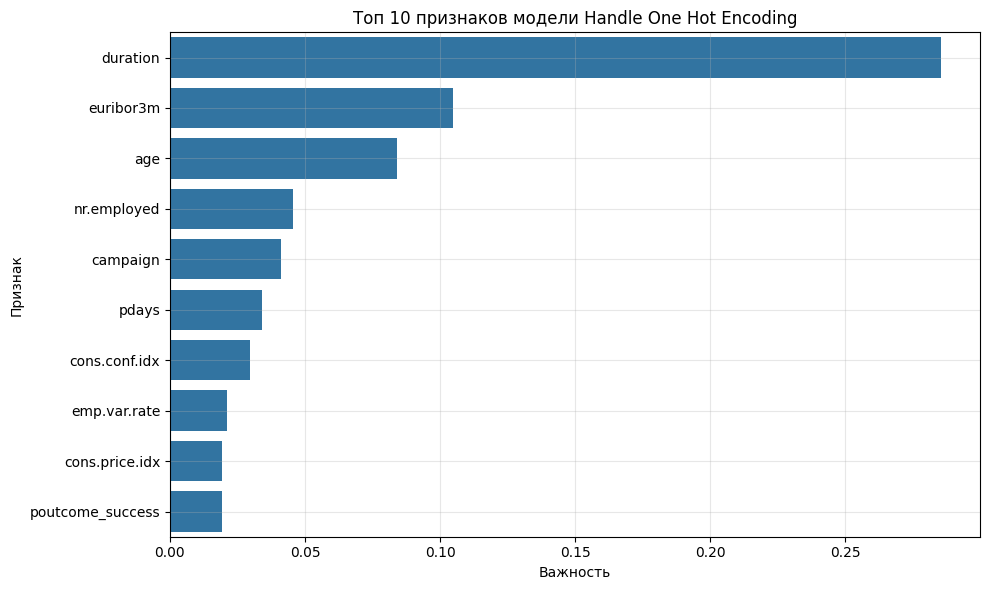

In [ ]:
handle_importance = get_feature_importance(X_train_handle_oh, rf_handle)
show_top_features('Handle One Hot Encoding', handle_importance, 10)

Да, видим, что категориальные фичи через OHE имеют очень низкую важность для модели - наиболее важная из них имеет показатель примерно 2%

# 3. Кодирование категориальных признаков (2 балла)
- Используй данные полученные 2  методом и далее во всех задачах

- Примените Label Encoding и One-Hot Encoding

- Обучите модель с закодированными признаками и на тестовой выборке оцените accuracy



## Используй данные полученные 2  методом и далее во всех задачах

In [ ]:
X_train = X_train_handle
X_test = X_test_handle

## Примените Label Encoding и One-Hot Encoding

Функцию для One Hot Encoding мы уже написали (onehot_encode_df) -> остается только Label Encoding.

onehot_encode_df просто скопирую ниже для удобства проверки

In [ ]:
def label_encode_df(X_train: pd.DataFrame, X_test: pd.DataFrame) -> tuple:
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    cat_features = X_train.select_dtypes(include='object').columns.tolist()
    encoders = {}
    for column in cat_features:
        le = LabelEncoder()
        X_train_encoded[column] = le.fit_transform(X_train_encoded[column])
        X_test_encoded[column] = le.transform(X_test_encoded[column])
        encoders[column] = le
    return X_train_encoded, X_test_encoded, encoders


def onehot_encode_df(X_train: pd.DataFrame, X_test: pd.DataFrame) -> tuple:
    train_df = X_train.copy()
    test_df = X_test.copy()
    oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    cat_features = train_df.select_dtypes(include='object').columns.tolist()

    train_encoded = oh.fit_transform(train_df[cat_features])
    train_encoded_cat = pd.DataFrame(
        train_encoded,
        columns=oh.get_feature_names_out(cat_features),
        index=train_df.index
    )
    train_onehoted_df = pd.concat([train_df, train_encoded_cat], axis=1)
    train_onehoted_df = train_onehoted_df.drop(columns=cat_features)

    test_encoded = oh.transform(test_df[cat_features])
    test_encoded_cat = pd.DataFrame(
        test_encoded,
        columns=oh.get_feature_names_out(cat_features),
        index=test_df.index
    )
    test_onehoted_df = pd.concat([test_df, test_encoded_cat], axis=1)
    test_onehoted_df = test_onehoted_df.drop(columns=cat_features)

    return train_onehoted_df, test_onehoted_df

In [ ]:
X_train_oh, X_test_oh = onehot_encode_df(X_train, X_test)
X_train_le, X_test_le, _ = label_encode_df(X_train, X_test)

## Обучите модель с закодированными признаками и на тестовой выборке оцените accuracy

In [ ]:
rf_oh_acc, _ = get_rf_accuracy_model(
    X_train_oh,
    y_train,
    X_test_oh,
    y_test
)
print_diff({'One Hot Encoding' : rf_oh_acc}, all_models)

rf_le_acc, rf_le = get_rf_accuracy_model(
    X_train_le,
    y_train,
    X_test_le,
    y_test
)
print_diff({'Label Encoding' : rf_le_acc}, all_models)


Accuracy score One Hot Encoding -> 0.9164

One Hot Encoding accuracy difference with other models:
Baseline -> 0.0000 (+0.0000%)
Delete -> -0.0023 (-0.2511%)
Handle -> 0.0000 (+0.0000%)
Delete Encoded -> -0.0036 (-0.3958%)
Handle Encoded -> 0.0000 (+0.0000%)


Accuracy score Label Encoding -> 0.9202

Label Encoding accuracy difference with other models:
Baseline -> 0.0039 (+0.4239%)
Delete -> 0.0016 (+0.1718%)
Handle -> 0.0039 (+0.4239%)
Delete Encoded -> 0.0002 (+0.0264%)
Handle Encoded -> 0.0039 (+0.4239%)
One Hot Encoding -> 0.0039 (+0.4239%)



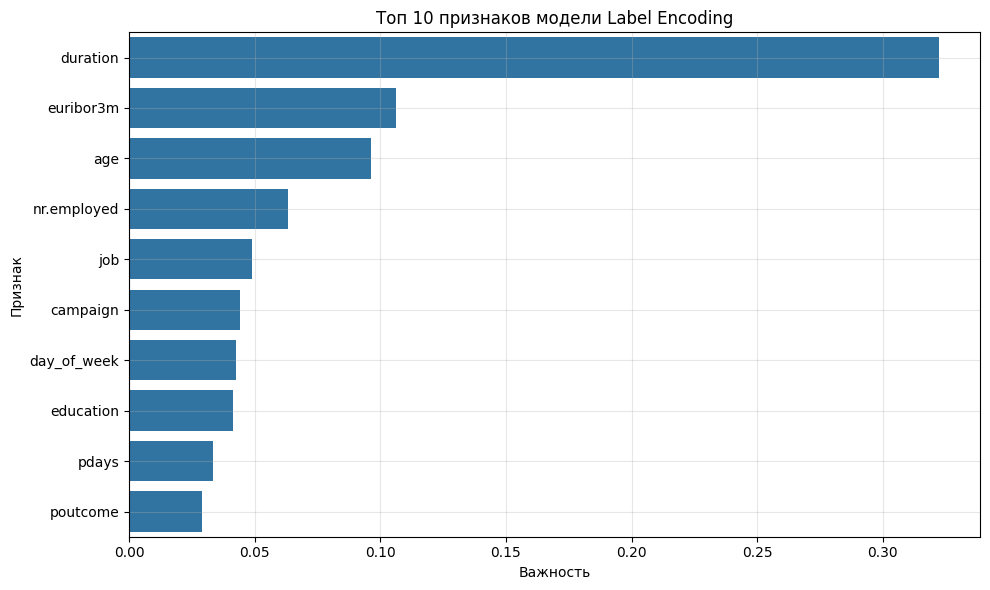

In [ ]:
label_importance = get_feature_importance(X_train_le, rf_le)
show_top_features('Label Encoding', label_importance, 10)

One Hot Encoding показал себя хуже всех остальных моделей, так как считает абсолютно неважными категориальные фичи в этом датасете, что мы увидели выше. Label Encoding же наоборот показывает лучшие из всех моделей результаты. Он, в отличие от OHE, не разбивает каждый категориальный признак на подкатегории, а учитывает его целиком - так, например, учитывается job. Из этого и получается, что общая важность категориальных признаков повышается и LE лидирует

# 4. Обработка выбросов (2 балла )
- Визуализируйте выбросы с помощью boxplot для числовых признаков.

- Примените метод IQR для обнаружения и обработки выбросов .

- Обучите модель на данных без выбросов и на тестовой выборке оцените accuracy


## Визуализируйте выбросы с помощью boxplot для числовых признаков.

In [ ]:
def get_boxplot_features(df: pd.DataFrame, target: pd.DataFrame) -> None:
    num_features = df.select_dtypes(include=np.number).columns.tolist()
    num_cols = len(num_features)
    num_rows = (num_cols + 2) // 3

    plt.figure(figsize=(18, 5 * num_rows))
    for i, column in enumerate(num_features):
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(data=df, x=target, y=column)
        plt.grid(True, alpha=0.3)
        plt.xlabel('Deposit decision')
        plt.ylabel(column)
        plt.title(f'BoxPlot -> {column}')
    plt.tight_layout()
    plt.show()



Благодаря Boxplot теперь явно видим выбросы в признаках. Так, например, в pdays совершенно не видно коробки - в датафрейме слишком много значений закрывают заглушкой "999" 31724 раза, из-за чего реальные показатели становятся незначительны - наиболее частый "3" 355 раз

In [ ]:
X_train.pdays.value_counts().head()

pdays
999    31724
3        355
6        337
4         97
2         52
Name: count, dtype: int64

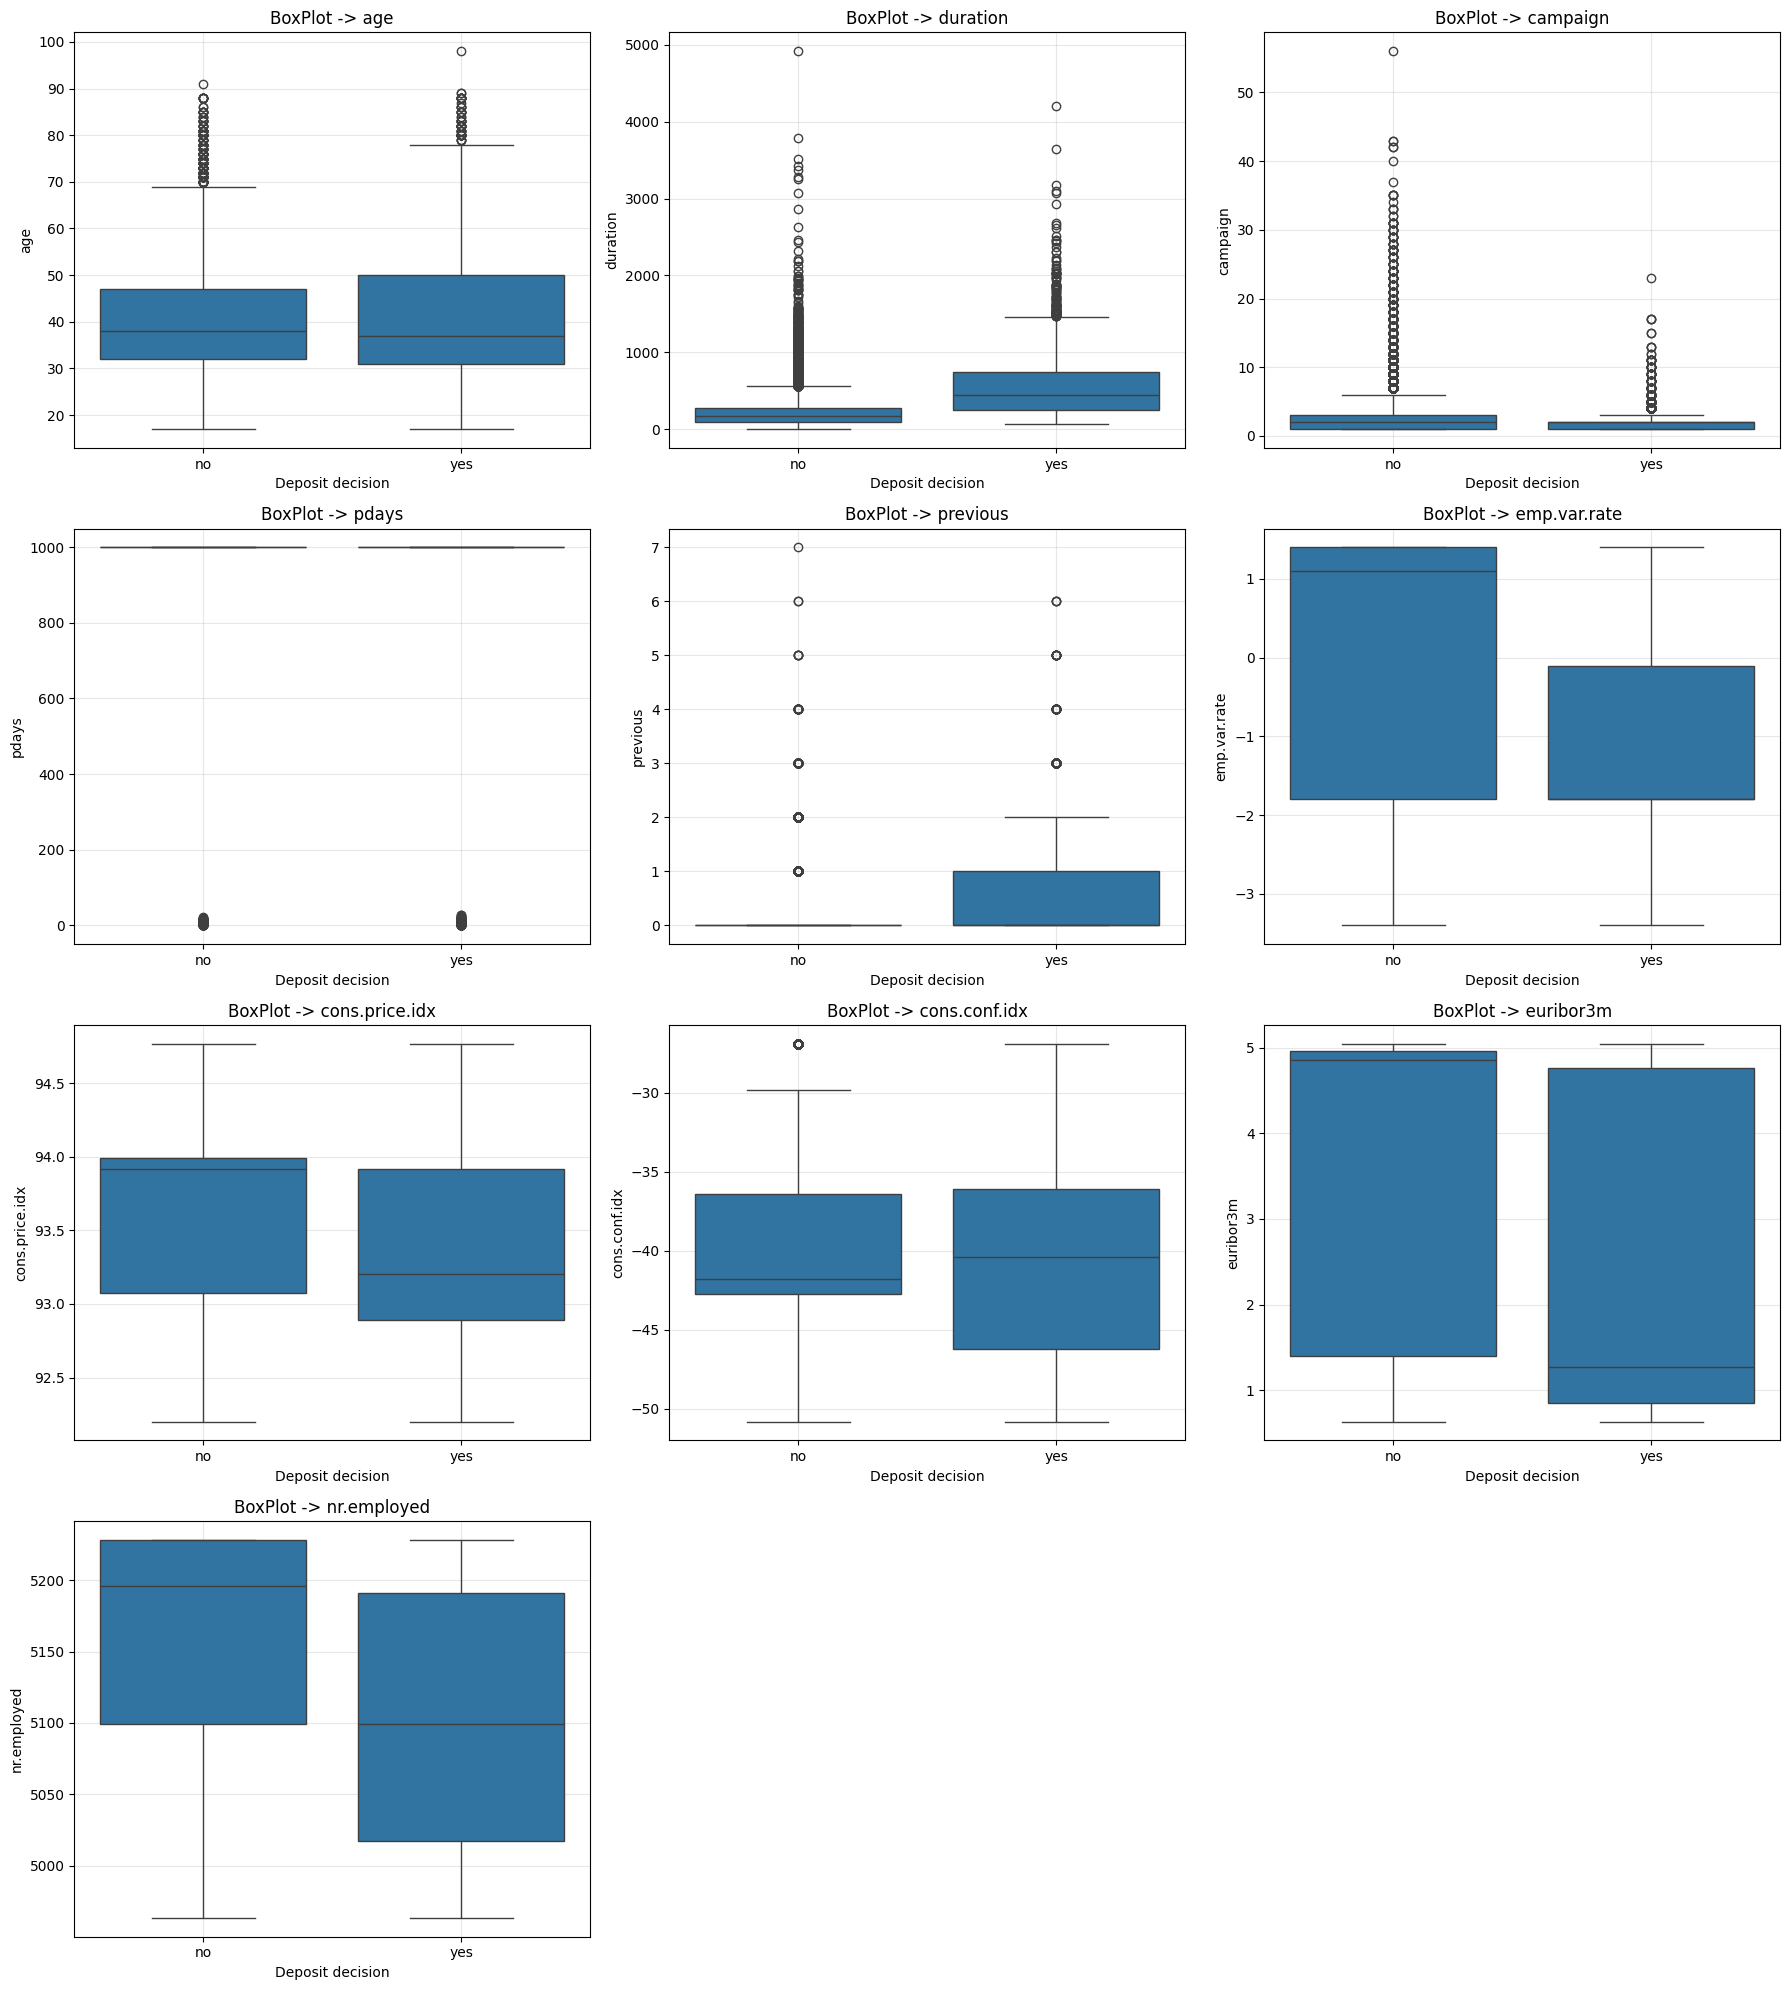

In [ ]:
get_boxplot_features(X_train, y_train)

## Примените метод IQR для обнаружения и обработки выбросов .

В функции для каждой категории определим границы (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR), затем с помощью clip() установим всем выбросам граничные значения. Не будем применять его на тесте, иначе получим некорректную модель в слишком хороших условиях

In [ ]:
def handle_outliers_iqr(X_train: pd.DataFrame) -> pd.DataFrame:
    X_clean = X_train.copy()
    num_features = X_clean.select_dtypes(include=np.number).columns.tolist()
    bounds = {}
    for column in num_features:
        Q1 = X_clean[column].quantile(0.25)
        Q3 = X_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        bounds[column] = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    for column, (lower, upper) in bounds.items():
        X_clean[column] = X_clean[column].clip(lower=lower, upper=upper)
    return X_clean

Видим, что по большей части выбросы были заменены на граничные значения, однако из-за формирования новых границ IQR появились выбросы уже по ним, но по старым границам они выбросами не считаются

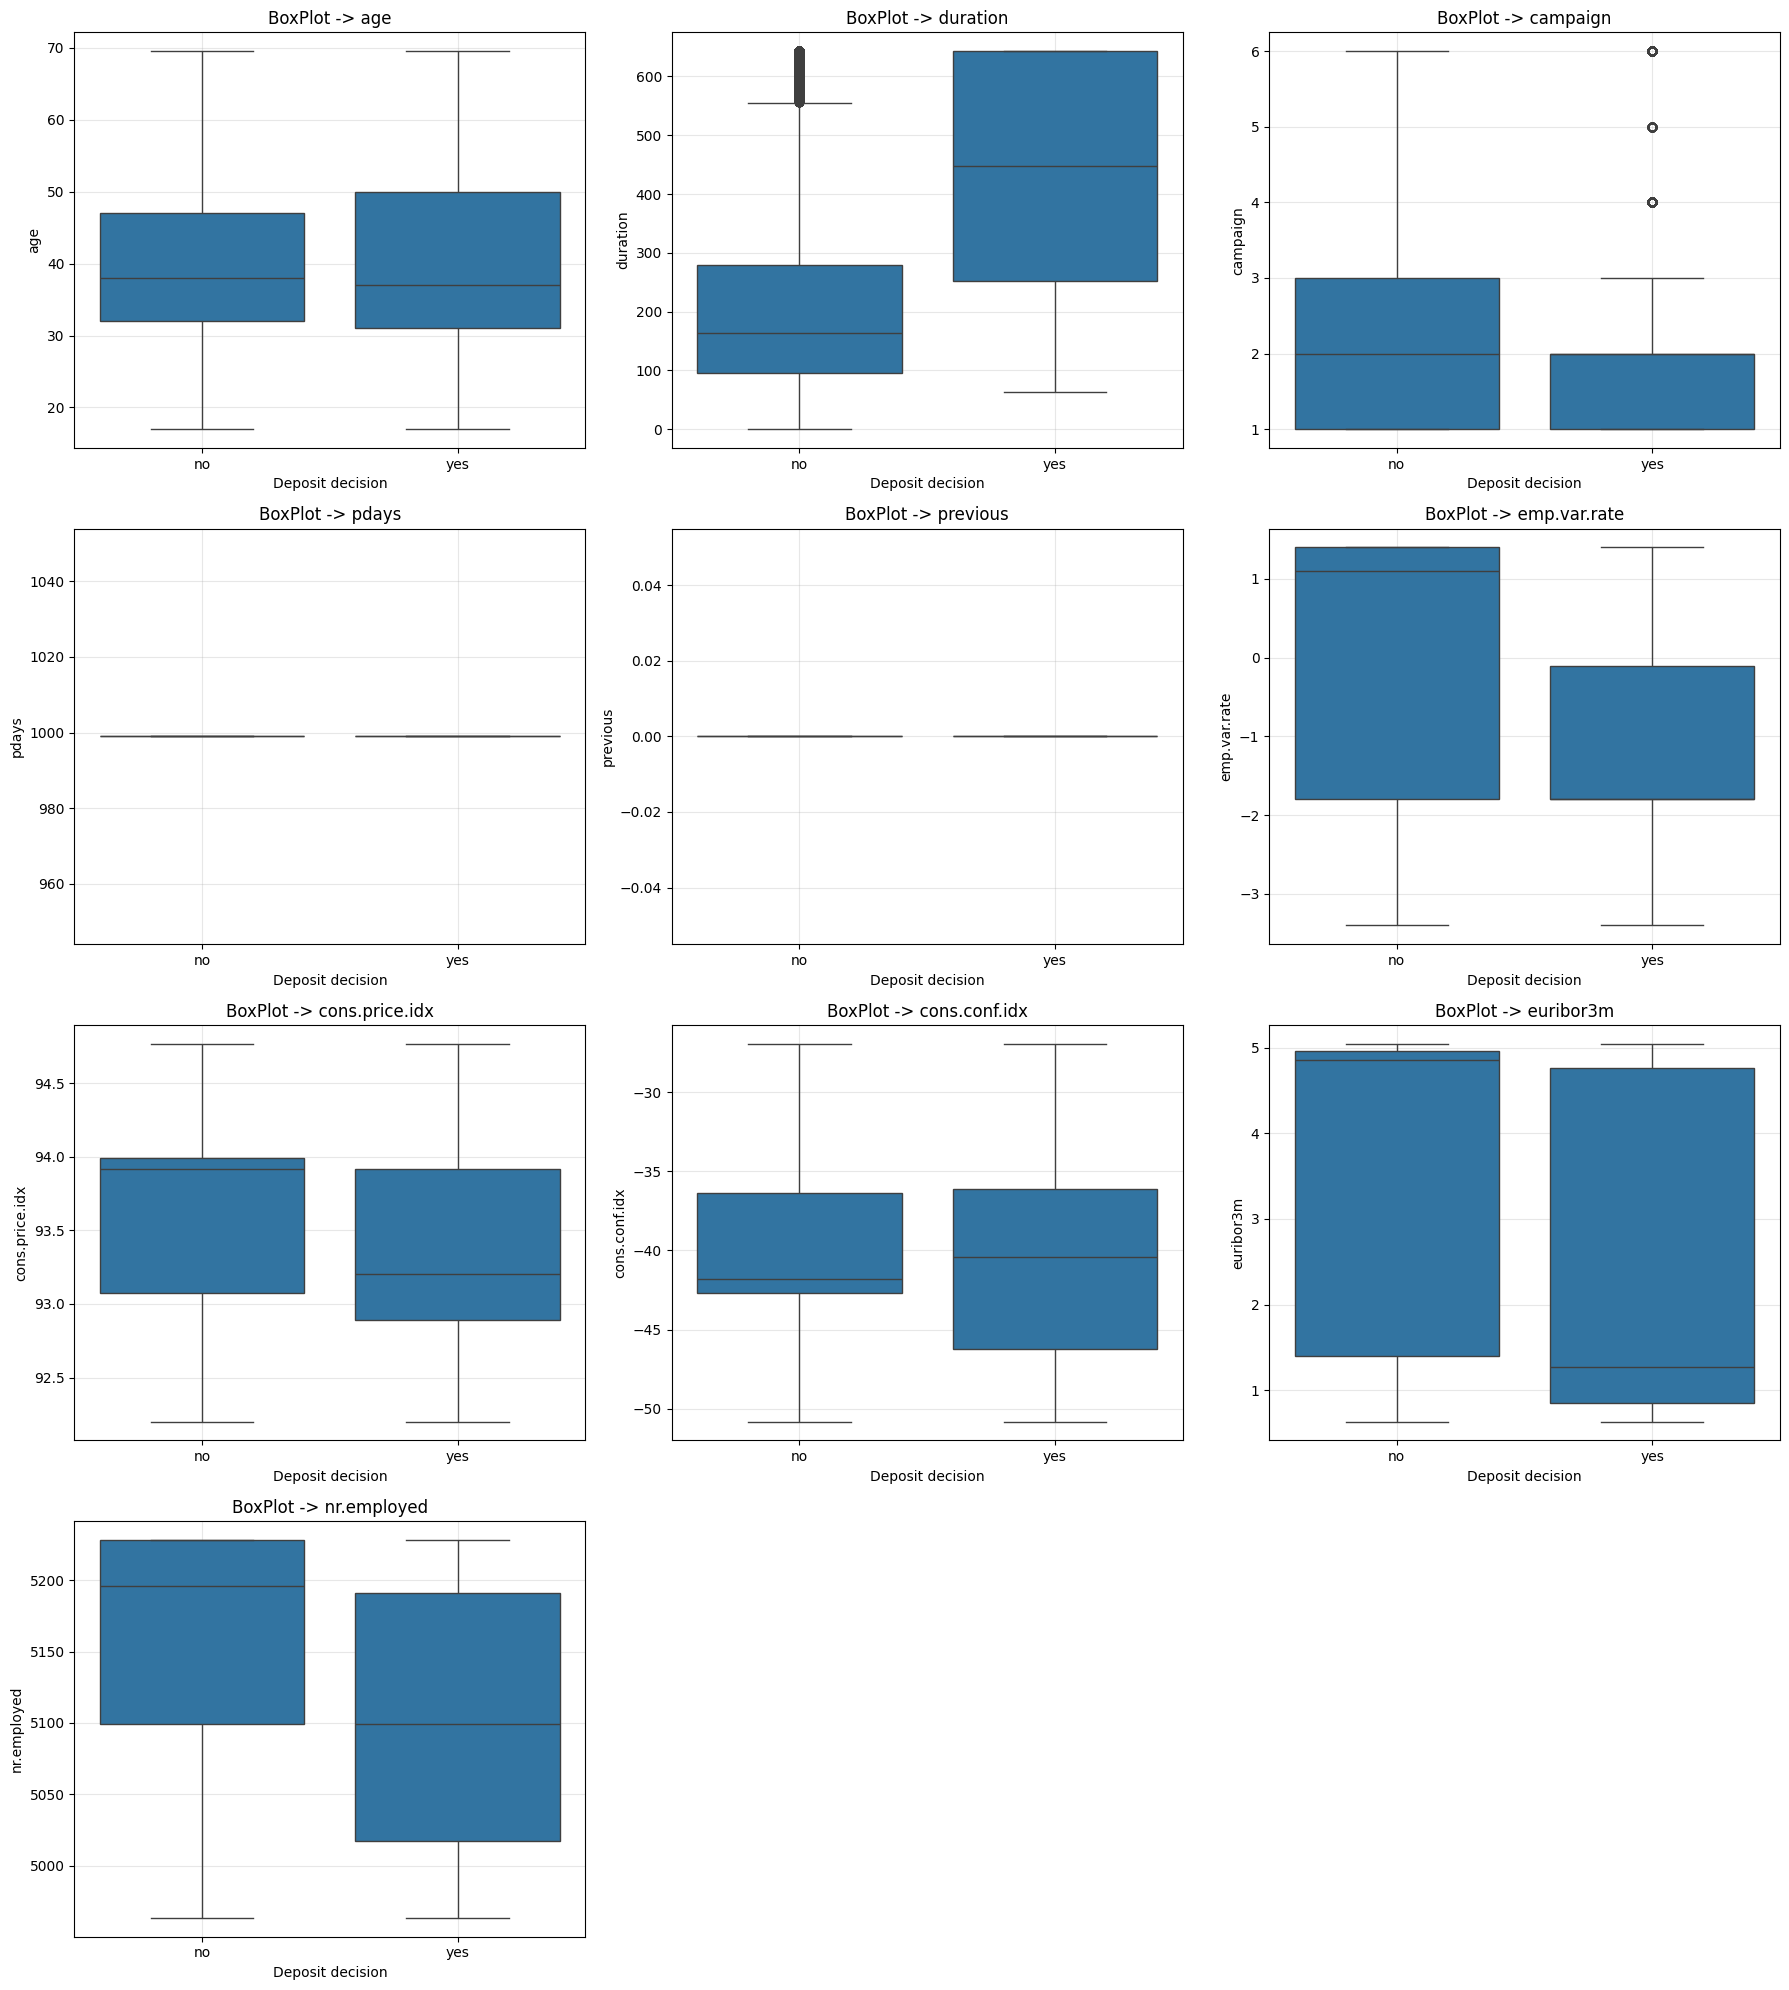

In [ ]:
X_train_iqr = handle_outliers_iqr(X_train)
get_boxplot_features(X_train_iqr, y_train)

## Обучите модель на данных без выбросов и на тестовой выборке оцените accuracy

Так как в задании явно не сказано, использовать ли категориальные фичи или нет, сделаем и так, и так

In [ ]:
X_train_iqr_num = X_train_iqr.select_dtypes(include=np.number)
X_test_num = X_test.select_dtypes(include=np.number)

rf_iqr_num_acc, _ = get_rf_accuracy_model(
    X_train_iqr_num,
    y_train,
    X_test_num,
    y_test
)
print_diff({'IQR Num' : rf_iqr_num_acc}, all_models)


X_train_iqr_le, X_test_iqr_le, _ = label_encode_df(X_train_iqr, X_test)

rf_iqr_le_acc, _ = get_rf_accuracy_model(
    X_train_iqr_le,
    y_train,
    X_test_iqr_le,
    y_test
)
print_diff({'IQR Label Encoding' : rf_iqr_le_acc}, all_models)


Accuracy score IQR Num -> 0.9093

IQR Num accuracy difference with other models:
Baseline -> -0.0070 (-0.7683%)
Delete -> -0.0093 (-1.0174%)
Handle -> -0.0070 (-0.7683%)
Delete Encoded -> -0.0107 (-1.1611%)
Handle Encoded -> -0.0070 (-0.7683%)
One Hot Encoding -> -0.0070 (-0.7683%)
Label Encoding -> -0.0109 (-1.1872%)


Accuracy score IQR Label Encoding -> 0.9190

IQR Label Encoding accuracy difference with other models:
Baseline -> 0.0027 (+0.2914%)
Delete -> 0.0004 (+0.0396%)
Handle -> 0.0027 (+0.2914%)
Delete Encoded -> -0.0010 (-0.1056%)
Handle Encoded -> 0.0027 (+0.2914%)
One Hot Encoding -> 0.0027 (+0.2914%)
Label Encoding -> -0.0012 (-0.1319%)
IQR Num -> 0.0097 (+1.0679%)



При обучении исключительно на числовых фичах теряем очень много accuracy по сравнению с другими моделями

# 5. Масштабирование признаков (2 балла)

- Примените StandardScaler или MinMaxScaler только к train выборке

- Обучите модель на данных с масштабированными признаками и на тестовой выборке оцените accuracy


In [ ]:
def scale_df(X_train: pd.DataFrame, method: str) -> pd.DataFrame:
    train_df = X_train.copy()
    num_features = train_df.select_dtypes(include=np.number).columns.tolist()
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError(f'Method -> standard, minmax')
    train_df[num_features] = scaler.fit_transform(train_df[num_features])
    return train_df

Так как в задании явно не сказано, использовать ли категориальные фичи или нет, сделаем и так, и так

In [ ]:
X_train_standard = scale_df(X_train, 'standard')
X_train_minmax = scale_df(X_train, 'minmax')


X_train_standard_num = X_train_standard.select_dtypes(include=np.number)
X_train_minmax_num = X_train_minmax.select_dtypes(include=np.number)
X_test_num = X_test.select_dtypes(include=np.number)

rf_standard_num_acc, _ = get_rf_accuracy_model(
    X_train_standard_num,
    y_train,
    X_test_num,
    y_test
)
print_diff({'Standard Scaler Num' : rf_standard_num_acc}, all_models)

rf_minmax_num_acc, _ = get_rf_accuracy_model(
    X_train_minmax_num,
    y_train,
    X_test_num,
    y_test
)
print_diff({'MinMax Scaler Num' : rf_minmax_num_acc}, all_models)


X_train_standard_le, X_test_standard_le, _ = label_encode_df(X_train_standard, X_test)
X_train_minmax_le, X_test_minmax_le, _ = label_encode_df(X_train_minmax, X_test)

rf_standard_le_acc, _ = get_rf_accuracy_model(
    X_train_standard_le,
    y_train,
    X_test_standard_le,
    y_test
)
print_diff({'Standard Scaler Label Encoding' : rf_standard_le_acc}, all_models)

rf_minmax_le_acc, _ = get_rf_accuracy_model(
    X_train_minmax_le,
    y_train,
    X_test_minmax_le,
    y_test
)
print_diff({'MinMax Scaler Label Encoding' : rf_minmax_le_acc}, all_models)


Accuracy score Standard Scaler Num -> 0.1163

Standard Scaler Num accuracy difference with other models:
Baseline -> -0.8001 (-87.3096%)
Delete -> -0.8024 (-87.3414%)
Handle -> -0.8001 (-87.3096%)
Delete Encoded -> -0.8037 (-87.3598%)
Handle Encoded -> -0.8001 (-87.3096%)
One Hot Encoding -> -0.8001 (-87.3096%)
Label Encoding -> -0.8040 (-87.3631%)
IQR Num -> -0.7930 (-87.2113%)
IQR Label Encoding -> -0.8027 (-87.3465%)


Accuracy score MinMax Scaler Num -> 0.2889

MinMax Scaler Num accuracy difference with other models:
Baseline -> -0.6275 (-68.4726%)
Delete -> -0.6298 (-68.5518%)
Handle -> -0.6275 (-68.4726%)
Delete Encoded -> -0.6311 (-68.5974%)
Handle Encoded -> -0.6275 (-68.4726%)
One Hot Encoding -> -0.6275 (-68.4726%)
Label Encoding -> -0.6313 (-68.6057%)
IQR Num -> -0.6204 (-68.2285%)
IQR Label Encoding -> -0.6301 (-68.5643%)
Standard Scaler Num -> 0.1726 (+148.4342%)


Accuracy score Standard Scaler Label Encoding -> 0.3194

Standard Scaler Label Encoding accuracy difference 

Получили ужасные результаты 0.11, 0.28 и немного лучше на LE выборках. Скорее всего это связано с тем, что по условию задания мы скалировали только трейн, а значит, что на тесте модель сталкивается с совершенно незнакомыми данными. Попробуем скалировать тест и посмотрим, что будет

In [ ]:
rf_standard_num_scaled_test_acc, _ = get_rf_accuracy_model(
    X_train_standard_num,
    y_train,
    scale_df(X_test_num, 'standard'),
    y_test
)
print_diff({'Standard Scaler Num Scaled Test' : rf_standard_num_scaled_test_acc}, all_models)

rf_minmax_num_scaled_test_acc, _ = get_rf_accuracy_model(
    X_train_minmax_num,
    y_train,
    scale_df(X_test_num, 'minmax'),
    y_test
)
print_diff({'MinMax Scaler Num Scaled Test' : rf_minmax_num_scaled_test_acc}, all_models)


rf_standard_le_scaled_test_acc, _ = get_rf_accuracy_model(
    X_train_standard_le,
    y_train,
    scale_df(X_test_standard_le, 'standard'),
    y_test
)
print_diff({'Standard Scaler Label Encoding Scaled Test' : rf_standard_le_scaled_test_acc}, all_models)

rf_minmax_le_scaled_test_acc, _ = get_rf_accuracy_model(
    X_train_minmax_le,
    y_train,
    scale_df(X_test_minmax_le, 'minmax'),
    y_test
)
print_diff({'MinMax Scaler Label Encoding' : rf_minmax_le_scaled_test_acc}, all_models)


Accuracy score Standard Scaler Num Scaled Test -> 0.9099

Standard Scaler Num Scaled Test accuracy difference with other models:
Baseline -> -0.0064 (-0.7021%)
Delete -> -0.0087 (-0.9514%)
Handle -> -0.0064 (-0.7021%)
Delete Encoded -> -0.0101 (-1.0951%)
Handle Encoded -> -0.0064 (-0.7021%)
One Hot Encoding -> -0.0064 (-0.7021%)
Label Encoding -> -0.0103 (-1.1212%)
IQR Num -> 0.0006 (+0.0667%)
IQR Label Encoding -> -0.0091 (-0.9906%)
Standard Scaler Num -> 0.7936 (+682.4635%)
MinMax Scaler Num -> 0.6210 (+214.9580%)
Standard Scaler Label Encoding -> 0.5906 (+184.9107%)
MinMax Scaler Label Encoding -> 0.4812 (+112.2310%)


Accuracy score MinMax Scaler Num Scaled Test -> 0.9007

MinMax Scaler Num Scaled Test accuracy difference with other models:
Baseline -> -0.0157 (-1.7088%)
Delete -> -0.0180 (-1.9556%)
Handle -> -0.0157 (-1.7088%)
Delete Encoded -> -0.0193 (-2.0979%)
Handle Encoded -> -0.0157 (-1.7088%)
One Hot Encoding -> -0.0157 (-1.7088%)
Label Encoding -> -0.0195 (-2.1237%)
IQR N

Предположение подтвердилось :)

При скалировании теста получили высокие показатели accuracy

# 6. Итоги (1 балл)

- Сравните модели и создайте таблицу с accuracy всех моделей.
- Сделайте выводы

In [ ]:
result_df = pd.DataFrame(list(all_models.items()), columns=['Model', 'Accuracy'])
result_df = result_df.sort_values('Accuracy', ascending=False)
result_df

,Model,Accuracy
6,Label Encoding,0.920248
3,Delete Encoded,0.920005
8,IQR Label Encoding,0.919034
1,Delete,0.918670
2,Handle,0.916363
4,Handle Encoded,0.916363
5,One Hot Encoding,0.916363
0,Baseline,0.916363
15,Standard Scaler Label Encoding Scaled Test,0.916242
13,Standard Scaler Num Scaled Test,0.909930


Наилучшее качество показала модель случайного леса с Label Encoding, в то время как One Hot Encoding не продемонстрировал никакого улучшения по сравнению с бейслайном - обучением по числовым фичам. Думаю, что результат такой из-за того, что лесу проще ориентироваться в порядковом разбиении категорий, чем пытаться разбивать на пороги большое количество бинарных признаков.

В то же время стало понятно, что использование метода IQR вместе с Label Encoding избыточно, так как скор хуже, а при обучении на числовых фичах модель слишком смягчает датафрейм заменой выбросов на граничные значения, в результате чего ей не хватает признаков для лучшего скора.

При использовании скейлеров, по заданию применяя скейл только на трейн, модель обучается на одних данных, а на тесте видит совсем другие, не замечает связи между выборками -> видим самый низкий accuracy. Если же скалировать и тестовую выборку, получим довольно высокий скор, но он все равно ниже бейслайна -> случайному лесу абсолютно всё равно на скалирование признаков.

Так же неплохо себя показали обычное удаление и замена признаков на моду, но в этом датасете нет пропусков в числовых фичах, на которых тренировалась модель, а значит смысл этих преобразований немного потерялся.